In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import ast
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()


import pandas as pd
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
df_UK = df[(df['job_country'] == 'United Kingdom')].dropna(subset=['salary_year_avg'])

In [5]:
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [6]:
df_UK_top6 = df_UK[df_UK['job_title_short'].isin(job_titles)]

In [16]:
job_order = df_UK_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

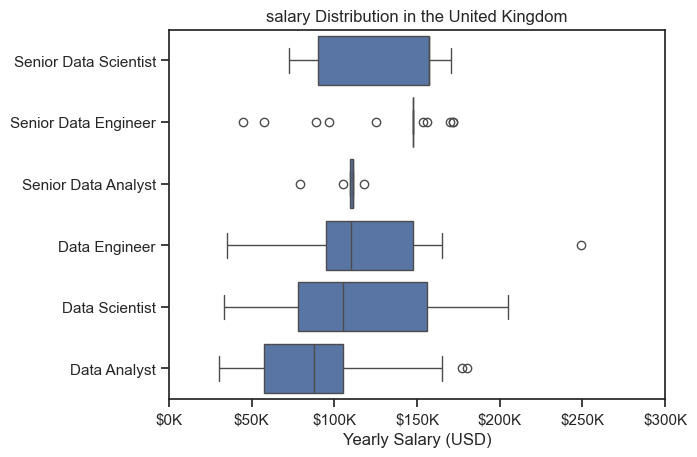

In [19]:
sns.boxplot(data=df_UK_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('salary Distribution in the United Kingdom')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [20]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'United Kingdom')].copy()
df_DA_UK =df_DA_UK.dropna(subset=['salary_year_avg'])

In [22]:
df_DA_UK = df_DA_UK.explode('job_skills')
df_DA_UK[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter
